In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading dataset 
data = pd.read_csv("Amazonreviews.csv")
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [5]:
# Exploratory Data Analysis
data_required = data[["reviews.text","reviews.rating"]]
data_required.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [6]:
data_required.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34659 non-null  object 
 1   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [7]:
# drop the missing values
data_required.dropna(inplace=True)
data_required.isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [8]:
# View random samples
import random

random_samples = 4

for _ in range(random_samples):
    i = random.choice(range(data_required.shape[0]))
    print(f"Review Text:\n{data_required['reviews.text'][i]} \n\nReview Rating:\n{data_required['reviews.rating'][i]}")
    print('\n', "--------------", '\n')
    

Review Text:
I absolutely love my fire tv it is amazing for everything 

Review Rating:
5.0

 -------------- 

Review Text:
Great tablet for the price. I purchased this as a Xmas gift 

Review Rating:
5.0

 -------------- 

Review Text:
Purchased this product for as a backup tablet. . The one con I have is that the internet browser runs a little slow. Other than that a good product. 

Review Rating:
3.0

 -------------- 

Review Text:
It has been useful for college looking up information I don't understand and for downloading books. It is also great for downloading apps such as Facebook, messageer, yahoo, google, Google maps, and the weather. It has also been great for downloading games. 

Review Rating:
5.0

 -------------- 



In [9]:
# Statistical data of dataset
data_required.describe()

,reviews.rating
count,34626.000000
mean,4.584561
std,0.735660
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
# distribution of rating
data_required['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23774
4.0     8541
3.0     1499
2.0      402
1.0      410
Name: reviews.rating, dtype: int64

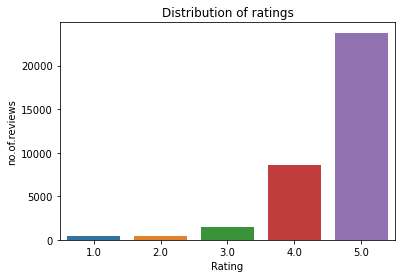

In [11]:
sns.countplot(data_required['reviews.rating'])

plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('no.of.reviews')
plt.show()

In [12]:
# Assign review ratings: 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


data_required['sentiment_score'] = data_required['reviews.rating'].map(sentiment_score)
data_required['sentiment'] = data_required['sentiment_score'].map(sentiment)

data_required.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


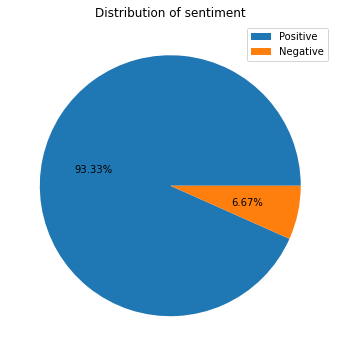

In [13]:
# distribution of sentiment
plt.figure(figsize = (6, 6))

labels = ['Positive', 'Negative']
plt.pie(data_required['sentiment'].value_counts(), autopct='%0.2f%%')

plt.title('Distribution of sentiment')
plt.legend(labels)
plt.show()

In [14]:
# As there is imbalance in the present data...add other data that contains low ratings.

# load the other data
data1 = pd.read_csv("additionaldata1.csv")
data1 = data1[['reviews.text', 'reviews.rating']]

# consider only negative reviews data 
data1 = data1[data1["reviews.rating"] <= 3].reset_index(drop=True)

data2 = pd.read_csv("additionaldata2.csv")
data2 = data2[['reviews.text', 'reviews.rating']]

data2 = data2[data2["reviews.rating"] <= 3].reset_index(drop=True)

In [15]:
# concat all the datasets
data = pd.concat([data_required, data1, data2])
data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1.0,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1.0,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1.0,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1.0,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1.0,POSITIVE


In [16]:
# New distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    23774
4.0     8541
3.0     2902
2.0     1072
1.0     1438
Name: reviews.rating, dtype: int64

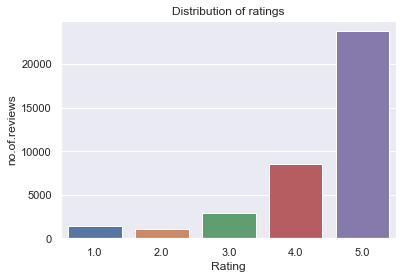

In [85]:
sns.countplot(data['reviews.rating'])

plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('no.of.reviews')
plt.show()

In [18]:
# Assign review ratings: 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


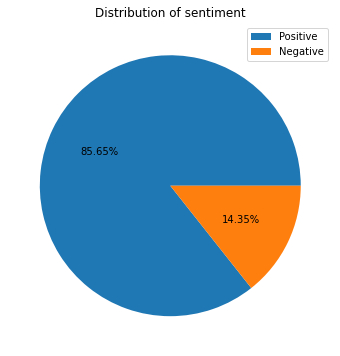

In [19]:
# distribution of sentiment
plt.figure(figsize = (6, 6))

labels = ['Positive', 'Negative']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%')

plt.title('Distribution of sentiment')
plt.legend(labels)
plt.show()

In [20]:
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [21]:
# Words in the text 
words = pd.Series(' '.join(data['reviews.text']).split())

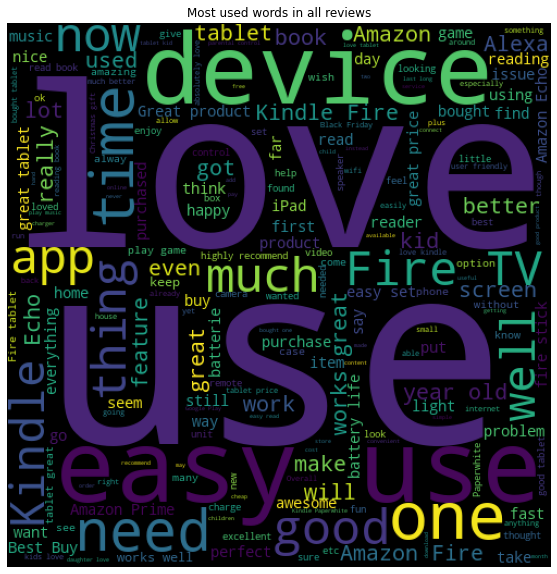

In [22]:
# plot word cloud
wordcloud = WordCloud(width = 500, height = 500).generate(' '.join(words))

plt.figure(figsize=(15,10))

plt.imshow(wordcloud)
plt.title("Most used words in all reviews")

plt.axis("off")
plt.show()

In [23]:
# words in positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews.text']).split())

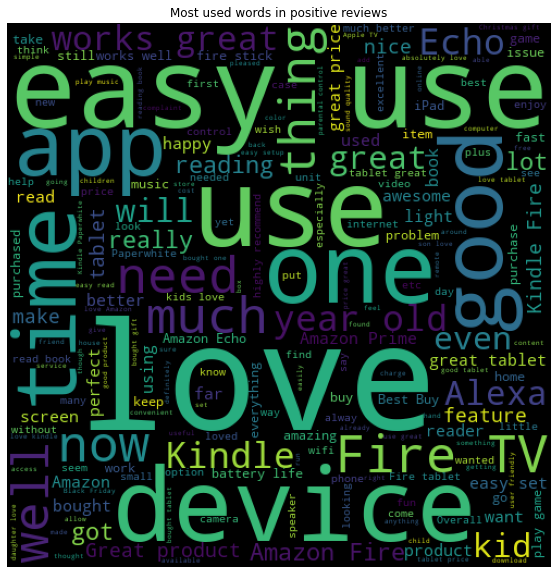

In [24]:
# plot word cloud
wordcloud = WordCloud(width = 500, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,10))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews")

plt.axis("off")
plt.show()

In [25]:
# words in negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews.text']).split())

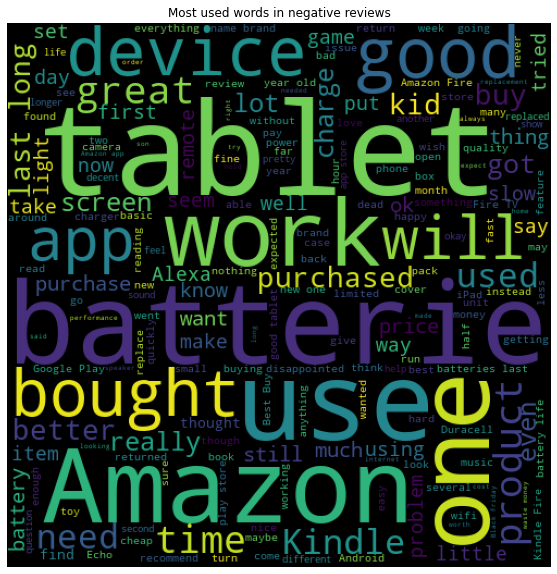

In [26]:
# plot word cloud
wordcloud = WordCloud(width = 500, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,10))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews")

plt.axis("off")
plt.show()

In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [28]:
# Data Preprocessing by removing whitespaces, HTML tags, punctuations
def clean_text(text:str):

    text = str(text)
    
    text = text.lower()
    text = text.strip()
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    
    return text

In [29]:
# Remove stopwords in the text
def remove_stopwords(text:str):
  
    text = str(text)
    cleaned_text = []

    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and","or"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            cleaned_text.append(w)
    text = " ".join(cleaned_text)
    
    return text

In [30]:
# stemming
def stemming_text(text:str):

    text = str(text)
    snow = SnowballStemmer('english')
    stemmed_text = []
    words = word_tokenize(text)
    for w in words:
        stemmed_text.append(snow.stem(w))
    text = " ".join(stemmed_text)
    
    return text

In [31]:
# Parts of speech tagger
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [32]:
# Lemmatization
def lemmatize(text:str):

    text = str(text)
    
    w = WordNetLemmatizer()
    lemmatized_text = []
    
    words = word_tokenize(text)
    word_pos_tags = nltk.pos_tag(words)
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_text.append(w.lemmatize(tag[0], get_wordnet_pos(tag[1])))
    lemmatized_text = " ".join(lemmatized_text)
    
    return lemmatized_text

In [33]:
# clean text
data['text'] = data['reviews.text'].apply(clean_text)

In [34]:
# remove stopwords
data['text'] = data['text'].apply(remove_stopwords)

In [35]:
# Apply lemmatization
data['text'] = data['text'].apply(lemmatize)

In [36]:
# Explore random cleaned reviews
import random

i = random.choice(range(len(data)))

print(f"Original text: \n{data['reviews.text'].iloc[i]}\n")
print(f"Cleaned text: \n{data['text'].iloc[i]}")

Original text: 
Great sound..music sounds live as if at a concert..love that it seems to have a personality..does more than I imagined. The weather, news time date plays local radio stations and any song or app on my smart phone..can use in any room..loving my purchase.

Cleaned text: 
great sound music sound live a if at concert love seem have personality do more than i imagine weather news time date play local radio station any song app on my smart phone can use in any room loving my purchase


In [37]:
# export cleaned data to csv
data.to_csv('cleaned_data.csv', index=False)

In [38]:
data = pd.read_csv('cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37727 entries, 0 to 37726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     37727 non-null  object 
 1   reviews.rating   37727 non-null  float64
 2   sentiment_score  37727 non-null  int64  
 3   sentiment        37727 non-null  object 
 4   text             37726 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [39]:
data[data['text'].isnull()]

,reviews.text,reviews.rating,sentiment_score,sentiment,text
9681,.................................................,5.0,1,POSITIVE,NaN


In [40]:
data.dropna(inplace=True)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TFIDF Vectorization
tfvectorizer = TfidfVectorizer()
tfvectorizer.fit(data['text'])
features = tfvectorizer.transform(data['text'])
features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
tf_idf = pd.DataFrame(features.toarray(), columns=tfvectorizer.get_feature_names())
tf_idf.head()

,00,000,000s,02,04,05,0ghz,10,100,1000,...,äîand,äô,äôll,äôm,äôs,äôsadvertisement,äôt,äôve,äù,äúskills
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Split the data into test and train sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.25, random_state=10)


In [44]:
Y = pd.DataFrame(y_train)
train_data = pd.concat([X_train, Y],axis=1)
train_data.head()

,00,000,000s,02,04,05,0ghz,10,100,1000,...,äô,äôll,äôm,äôs,äôsadvertisement,äôt,äôve,äù,äúskills,sentiment_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# Over sampling

from collections import Counter
from sklearn.datasets import make_classification

# Divide the class
positive_class = train_data[train_data['sentiment_score'] == 1]
negative_class = train_data[train_data['sentiment_score'] == 0]

negative_over = negative_class.sample(train_data['sentiment_score'].value_counts()[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
print(df_train_over.sentiment_score.value_counts())

0.0    24266
1.0    24266
Name: sentiment_score, dtype: int64


In [46]:
df_train_over.dropna(inplace=True)

In [47]:
X_train = df_train_over.iloc[:,:-1]
y_train = df_train_over['sentiment_score']

In [48]:
from sklearn.model_selection import cross_validate

def classifier(model):
    
    model.fit(X_train,y_train)
    
    global y_pred
    y_pred = model.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test,y_pred)
    print('Accuracy score = ',accuracy)
    
    from sklearn.metrics import roc_auc_score
    print ('AUC = ',roc_auc_score(y_test, y_pred))
    
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns; sns.set()
    CM = confusion_matrix(y_test,y_pred)
    fig,ax = plt.subplots(figsize=(10,8))
    sns.heatmap(CM,annot=True,fmt='d')
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    plt.show()

Accuracy score =  0.8678965224766751
AUC =  0.8172906204392143
              precision    recall  f1-score   support

           0       0.54      0.75      0.62      1384
           1       0.95      0.89      0.92      8048

    accuracy                           0.87      9432
   macro avg       0.74      0.82      0.77      9432
weighted avg       0.89      0.87      0.88      9432



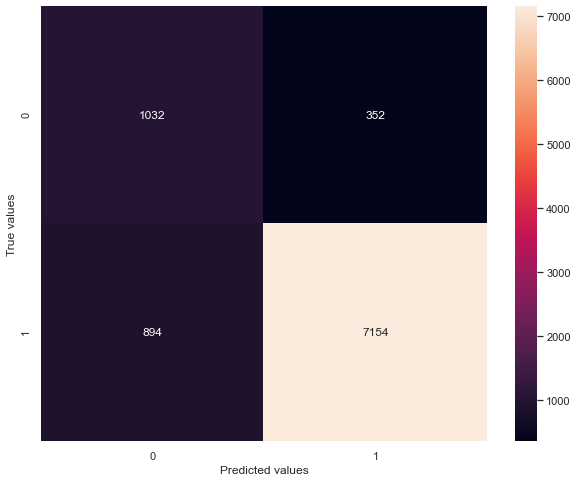

In [47]:
from sklearn.naive_bayes import MultinomialNB
classifier(MultinomialNB())

Accuracy score =  0.857930449533503
AUC =  0.8207241378319677
              precision    recall  f1-score   support

           0       0.51      0.77      0.61      1384
           1       0.96      0.87      0.91      8048

    accuracy                           0.86      9432
   macro avg       0.73      0.82      0.76      9432
weighted avg       0.89      0.86      0.87      9432



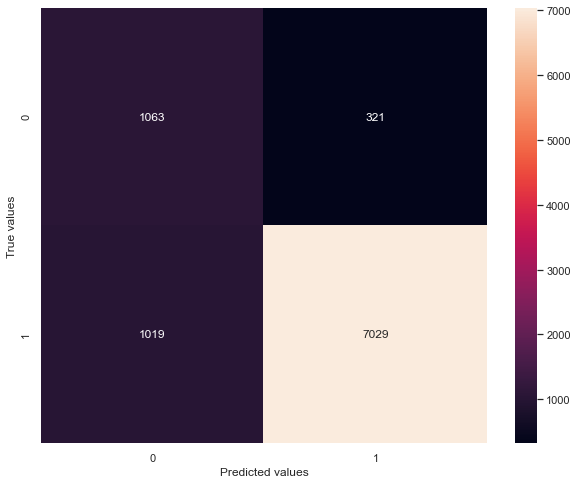

In [48]:
from sklearn.linear_model import LogisticRegression
classifier(LogisticRegression())

Accuracy score =  0.9265267175572519
AUC =  0.7625019392316621
              precision    recall  f1-score   support

           0       0.94      0.53      0.68      1384
           1       0.92      0.99      0.96      8048

    accuracy                           0.93      9432
   macro avg       0.93      0.76      0.82      9432
weighted avg       0.93      0.93      0.92      9432



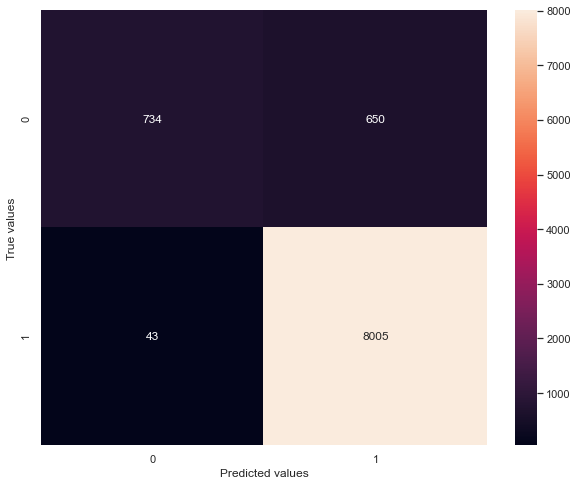

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier(RandomForestClassifier())

Accuracy score =  0.849342663273961
AUC =  0.8127003872717453
              precision    recall  f1-score   support

           0       0.49      0.76      0.60      1384
           1       0.95      0.86      0.91      8048

    accuracy                           0.85      9432
   macro avg       0.72      0.81      0.75      9432
weighted avg       0.89      0.85      0.86      9432



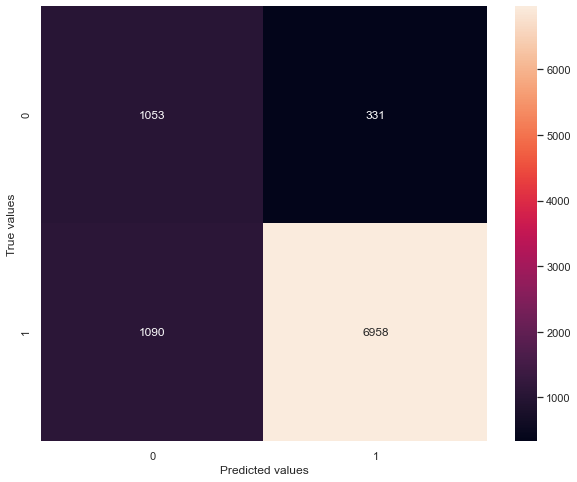

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
classifier(GradientBoostingClassifier())

Accuracy score =  0.7543469041560644
AUC =  0.727718228203036
              precision    recall  f1-score   support

           0       0.34      0.69      0.45      1384
           1       0.93      0.77      0.84      8048

    accuracy                           0.75      9432
   macro avg       0.64      0.73      0.65      9432
weighted avg       0.85      0.75      0.78      9432



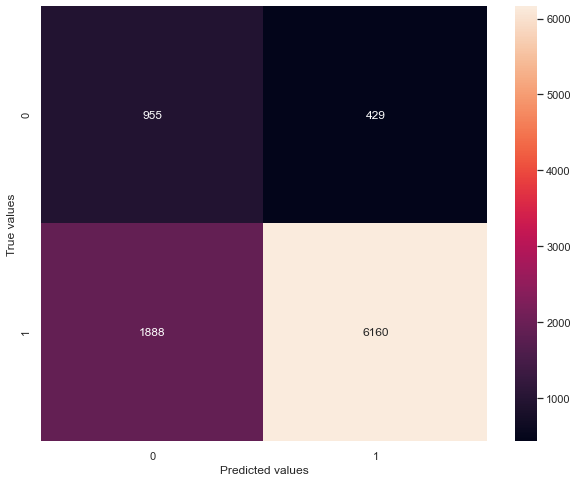

In [51]:
from sklearn.linear_model import Perceptron
classifier(Perceptron())

Accuracy score =  0.8530534351145038
AUC =  0.7541485192888908
              precision    recall  f1-score   support

           0       0.50      0.61      0.55      1384
           1       0.93      0.89      0.91      8048

    accuracy                           0.85      9432
   macro avg       0.72      0.75      0.73      9432
weighted avg       0.87      0.85      0.86      9432



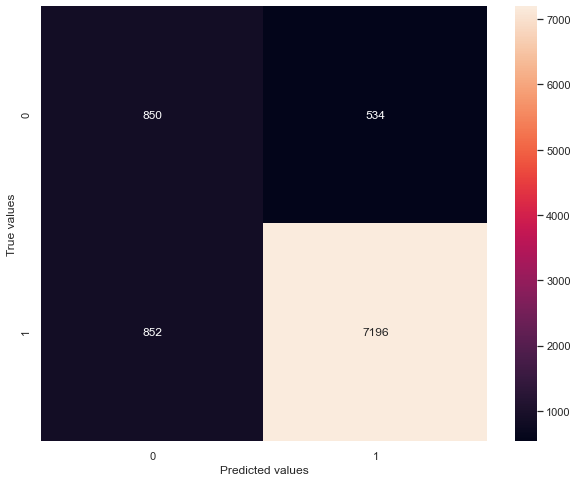

In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier(DecisionTreeClassifier())

In [49]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X_train,y_train)

In [50]:
from sklearn.model_selection import cross_validate

def classifier(model):
    
    model.fit(X_train,y_train)
    
    global y_pred
    y_pred = model.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test,y_pred)
    print('Accuracy score = ',accuracy)
    
    from sklearn.metrics import roc_auc_score
    print ('AUC = ',roc_auc_score(y_test, y_pred))
    
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns; sns.set()
    CM = confusion_matrix(y_test,y_pred)
    fig,ax = plt.subplots(figsize=(10,8))
    sns.heatmap(CM,annot=True,fmt='d')
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    plt.show()

Accuracy score =  0.8666242578456319
AUC =  0.819835682437169
              precision    recall  f1-score   support

           0       0.53      0.75      0.62      1384
           1       0.95      0.89      0.92      8048

    accuracy                           0.87      9432
   macro avg       0.74      0.82      0.77      9432
weighted avg       0.89      0.87      0.88      9432



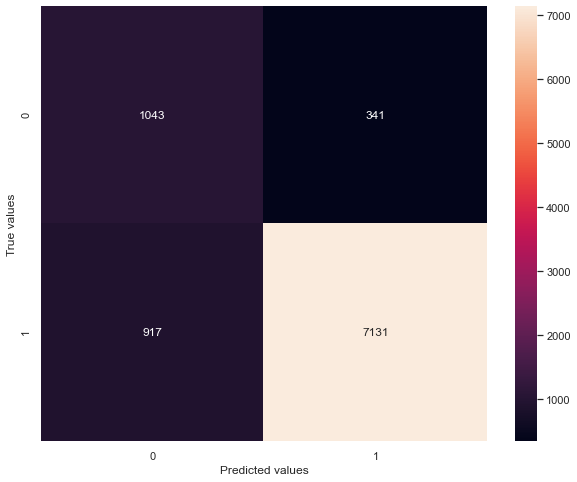

In [51]:
from sklearn.naive_bayes import MultinomialNB
classifier(MultinomialNB())

Accuracy score =  0.8589906700593724
AUC =  0.8249351434744137
              precision    recall  f1-score   support

           0       0.51      0.78      0.62      1384
           1       0.96      0.87      0.91      8048

    accuracy                           0.86      9432
   macro avg       0.74      0.82      0.77      9432
weighted avg       0.89      0.86      0.87      9432



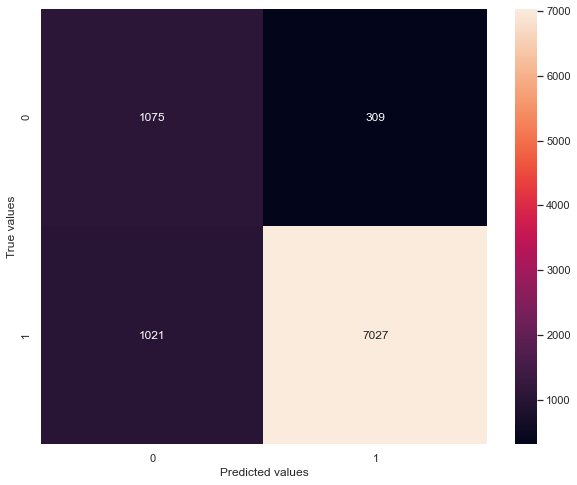

In [52]:
from sklearn.linear_model import LogisticRegression
classifier(LogisticRegression())

Accuracy score =  0.9272688719253604
AUC =  0.7635351187671657
              precision    recall  f1-score   support

           0       0.95      0.53      0.68      1384
           1       0.93      1.00      0.96      8048

    accuracy                           0.93      9432
   macro avg       0.94      0.76      0.82      9432
weighted avg       0.93      0.93      0.92      9432



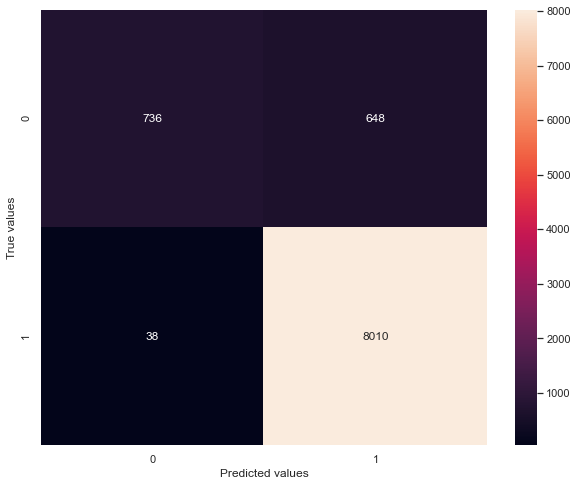

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier(RandomForestClassifier())

Accuracy score =  0.8432994062765055
AUC =  0.8112531458646962
              precision    recall  f1-score   support

           0       0.48      0.77      0.59      1384
           1       0.96      0.86      0.90      8048

    accuracy                           0.84      9432
   macro avg       0.72      0.81      0.75      9432
weighted avg       0.89      0.84      0.86      9432



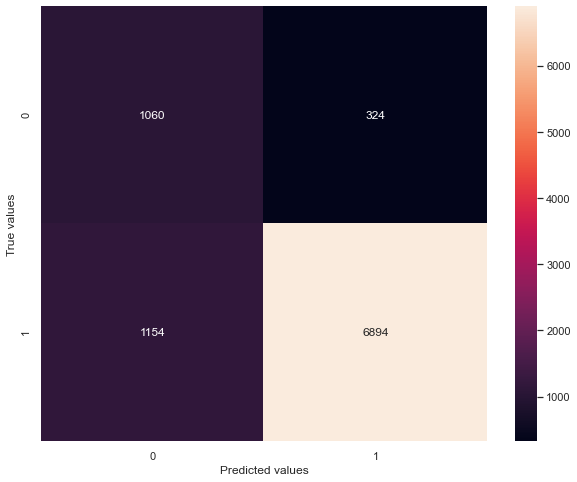

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
classifier(GradientBoostingClassifier())

Accuracy score =  0.7357930449533503
AUC =  0.7303074615888484
              precision    recall  f1-score   support

           0       0.32      0.72      0.45      1384
           1       0.94      0.74      0.83      8048

    accuracy                           0.74      9432
   macro avg       0.63      0.73      0.64      9432
weighted avg       0.85      0.74      0.77      9432



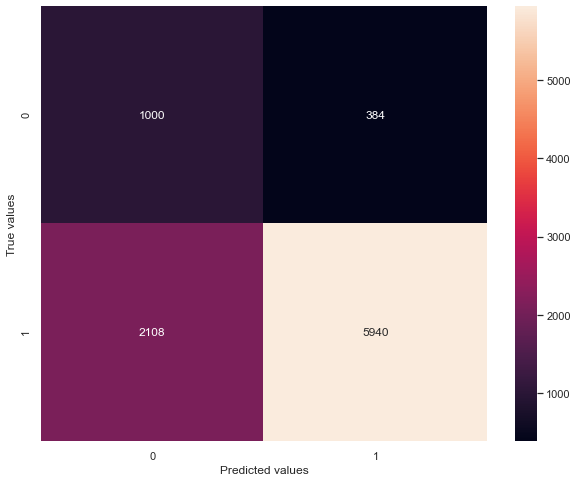

In [55]:
from sklearn.linear_model import Perceptron
classifier(Perceptron())

Accuracy score =  0.8606870229007634
AUC =  0.7610148358404487
              precision    recall  f1-score   support

           0       0.52      0.62      0.57      1384
           1       0.93      0.90      0.92      8048

    accuracy                           0.86      9432
   macro avg       0.73      0.76      0.74      9432
weighted avg       0.87      0.86      0.87      9432



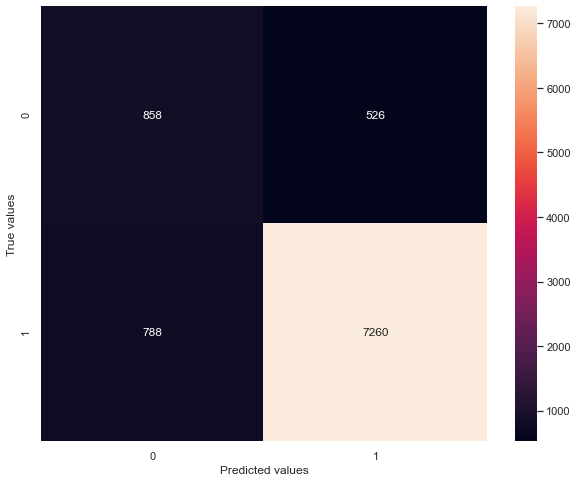

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier(DecisionTreeClassifier())

In [46]:
# Using combination of Undersampling and SMOTE

In [45]:
# Under sampling

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# Divide the class
positive_class = train_data[train_data['sentiment_score'] == 1]
negative_class = train_data[train_data['sentiment_score'] == 0]

positive_under = positive_class.sample(train_data['sentiment_score'].value_counts()[0], replace=True)

df_train_under = pd.concat([negative_class, positive_under], axis=0)
print(df_train_under.sentiment_score.value_counts())

0.0    4028
1.0    4028
Name: sentiment_score, dtype: int64


In [46]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X_train,y_train)

In [79]:
from sklearn.model_selection import cross_validate

def classifier(model):
    
    model.fit(X_train,y_train)
    
    global y_pred
    y_pred = model.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test,y_pred)
    print('Accuracy score = ',accuracy)
    
    from sklearn.metrics import roc_auc_score
    print ('AUC = ',roc_auc_score(y_test, y_pred))
    
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns; sns.set()
    CM = confusion_matrix(y_test,y_pred)
    fig,ax = plt.subplots(figsize=(6,6))
    sns.heatmap(CM,annot=True,fmt='d')
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    plt.show()
    
    from plot_metric.functions import BinaryClassification
    curveplot = BinaryClassification(y_test,y_pred, labels=["positive_class","negative_class"])
    plt.figure(figsize=(6,6))
    curveplot.plot_roc_curve()
    plt.show()
    

Accuracy score =  0.8844359626802375
AUC =  0.6071113061515301
              precision    recall  f1-score   support

           0       0.99      0.21      0.35      1384
           1       0.88      1.00      0.94      8048

    accuracy                           0.88      9432
   macro avg       0.94      0.61      0.64      9432
weighted avg       0.90      0.88      0.85      9432



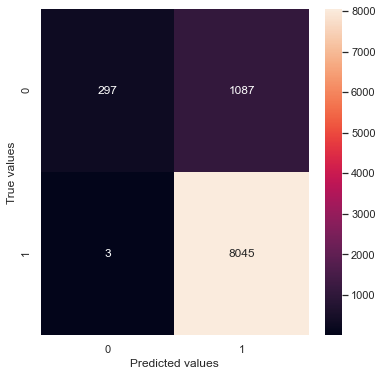

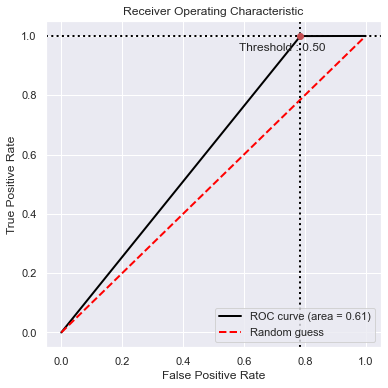

In [80]:
from sklearn.naive_bayes import MultinomialNB
classifier(MultinomialNB())

Accuracy score =  0.9188931297709924
AUC =  0.7610202225950654
              precision    recall  f1-score   support

           0       0.86      0.54      0.66      1384
           1       0.93      0.98      0.95      8048

    accuracy                           0.92      9432
   macro avg       0.89      0.76      0.81      9432
weighted avg       0.92      0.92      0.91      9432



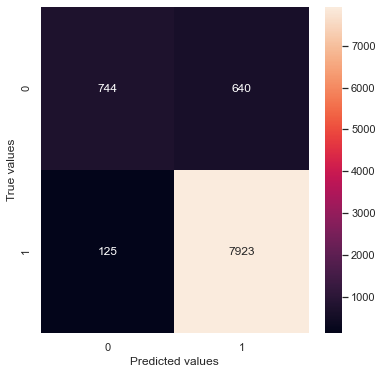

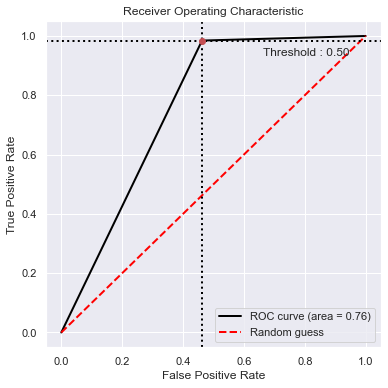

In [81]:
from sklearn.linear_model import LogisticRegression
classifier(LogisticRegression())

Accuracy score =  0.9359626802374894
AUC =  0.787774796308852
              precision    recall  f1-score   support

           0       0.98      0.58      0.73      1384
           1       0.93      1.00      0.96      8048

    accuracy                           0.94      9432
   macro avg       0.95      0.79      0.84      9432
weighted avg       0.94      0.94      0.93      9432



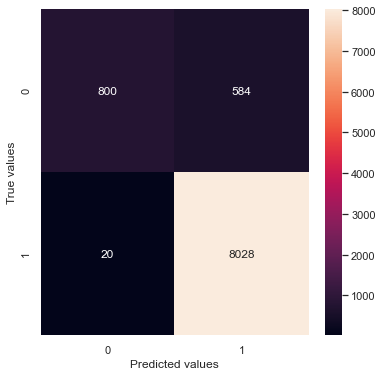

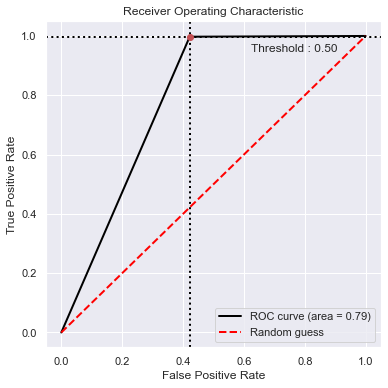

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier(RandomForestClassifier())

Accuracy score =  0.8982188295165394
AUC =  0.6795039014468105
              precision    recall  f1-score   support

           0       0.85      0.37      0.52      1384
           1       0.90      0.99      0.94      8048

    accuracy                           0.90      9432
   macro avg       0.88      0.68      0.73      9432
weighted avg       0.89      0.90      0.88      9432



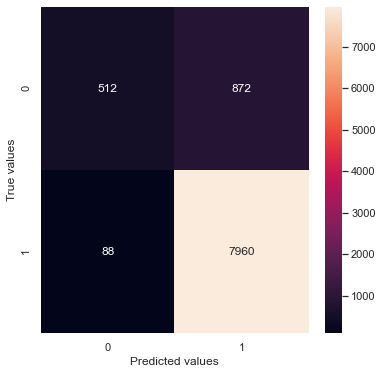

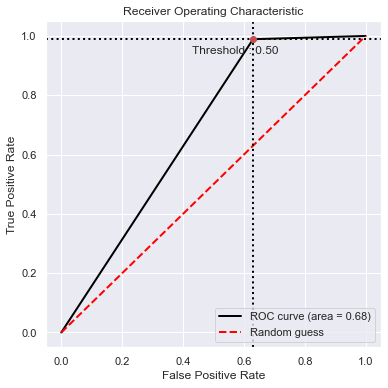

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
classifier(GradientBoostingClassifier())

Accuracy score =  0.9064885496183206
AUC =  0.7112728254748963
              precision    recall  f1-score   support

           0       0.86      0.43      0.58      1384
           1       0.91      0.99      0.95      8048

    accuracy                           0.91      9432
   macro avg       0.88      0.71      0.76      9432
weighted avg       0.90      0.91      0.89      9432



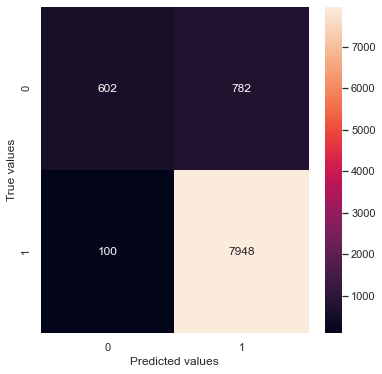

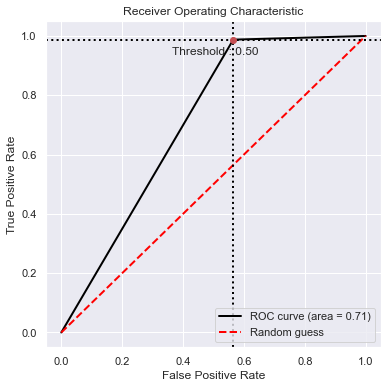

In [88]:
from sklearn.linear_model import Perceptron
classifier(Perceptron())

Accuracy score =  0.9020356234096693
AUC =  0.8067828577666947
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      1384
           1       0.94      0.94      0.94      8048

    accuracy                           0.90      9432
   macro avg       0.80      0.81      0.81      9432
weighted avg       0.90      0.90      0.90      9432



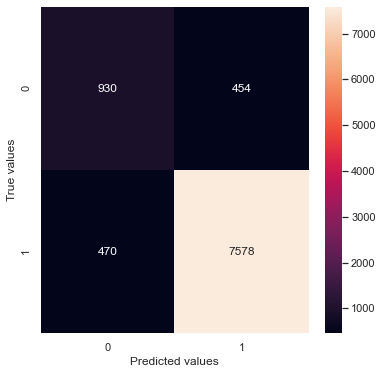

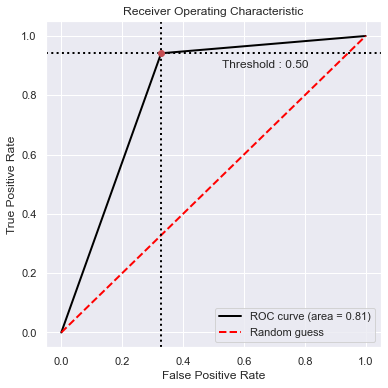

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier(DecisionTreeClassifier())